# Case Study on Video Game Sales

## Import necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#baka may libraries pa kayo gusto i-add(?)

## Dataset: The Video Game Sales Dataset

For this notebook, we will work on a dataset called `video game sales,` obtained from https://www.kaggle.com/gregorut/videogamesales. The dataset contains a list of video games with sales greater than 100,000 copies and are over 16,500 records. These records were generated by a scrape of https://www.vgchartz.com/gamedb/.

If you view the `.csv` file in Excel, you can see that our dataset contains 16,598 **observations** (rows) across 11 **variables** (columns). The following are the descriptions of each variable in the dataset.

- **`Rank`**: Ranking of overall sales
- **`Name`**: The games name
- **`Platform`**: Platform of the games release (i.e. `PC`, `PS4`, etc.)
- **`Year`**: Year of the game's release
- **`Genre`**: Genre of the game
- **`Publisher`**: Publisher of the game
- **`NA_Sales`**: Sales in North America (in millions)
- **`EU_Sales`**: Sales in Europe (in millions)
- **`JP_Sales`**: Sales in Japan (in millions)
- **`Other_Sales`**: Sales in the rest of the world (in millions)
- **`Global_Sales`**: Total worldwide sales.

Let's read the dataset.

In [3]:
vgsales_df = pd.read_csv("vgsales.csv")

Now let's display general information about the dataset with the [`info`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html) function, which displays general information about the dataset.

In [5]:
vgsales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


## Cleaning the Dataset
As this Dataset was a result of scraping, it will contain missing and irrelevant information. It is important we clean it before diving deeper into our Notebook. Here we will be removing some variables as they are irrelevant and are not required for any of our **Exploratory Data Analysis**. 

- **`Rank`**: No analysis will be done based on the sales rank of a game.
- **`Year`**: Some of the entries have years that are `NaN` or beyond `2016` which should not be possible as this Dataset was published last 2016.



In [4]:
# new_df will be used for testing muna
new_df = vgsales_df

For now, we can change these values into `NaN` as their other variables could still be used for our analysis.

## Exploratory Data Analysis 

Video games have increasingly become popular in recent years. The researchers have decided that looking at video game trends/details could be used to determine what new games would match the interest of the community. This research would be aimed towards the gaming community and video game companies to help increase the sales of upcoming games.  

### **Among all the consoles, which platform is more preferred for the Action genre?**

Text(0.5, 1.0, 'Platform vs Role-Playing Genre Sales')

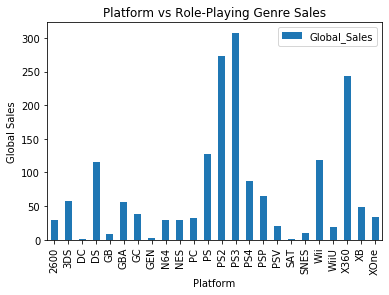

In [9]:
#Removes the columns of the unnecessary data
preferred_df = new_df.drop(["Rank", "Year", "Publisher","NA_Sales","EU_Sales", "JP_Sales", "Other_Sales"], axis=1) 

#Removes the rows of the unnecessary data
preferred_df = preferred_df[preferred_df['Genre'] == 'Action']



#Sums the Global Sales
preferred_df = preferred_df.groupby("Platform").sum()


#Creates the bar graph



preferred_df.plot.bar()
plt.xlabel('Platform')
plt.ylabel('Global Sales')
plt.title('Platform vs Role-Playing Genre Sales')

As we can see above, the PS3 console dominates the Role-Playing genre scene in terms of sales followed by PS2 then Xbox360.

###  **Which genre has the most sales globally?**

Text(0.5, 1.0, 'Genre vs Sales in consoles')

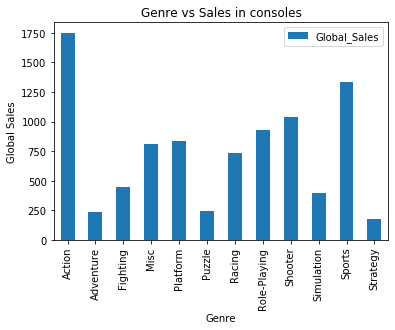

In [17]:
#Removes the columns of the unnecessary data
sales_df = new_df.drop(["Rank", "Year", "Publisher","NA_Sales","EU_Sales", "JP_Sales", "Other_Sales","Platform"], axis=1) 


#Sums the Global Sales
sales_df = sales_df.groupby("Genre").sum()


#Creates the bar graph



sales_df.plot.bar()
plt.xlabel('Genre')
plt.ylabel('Global Sales')
plt.title('Genre vs Sales in consoles')


The `Action` genre dominates across all platforms is terms of `Global_Sales`.

### Which genres are prevalent

Text(0.5, 1.0, 'Platform Genre vs Quantitiy')

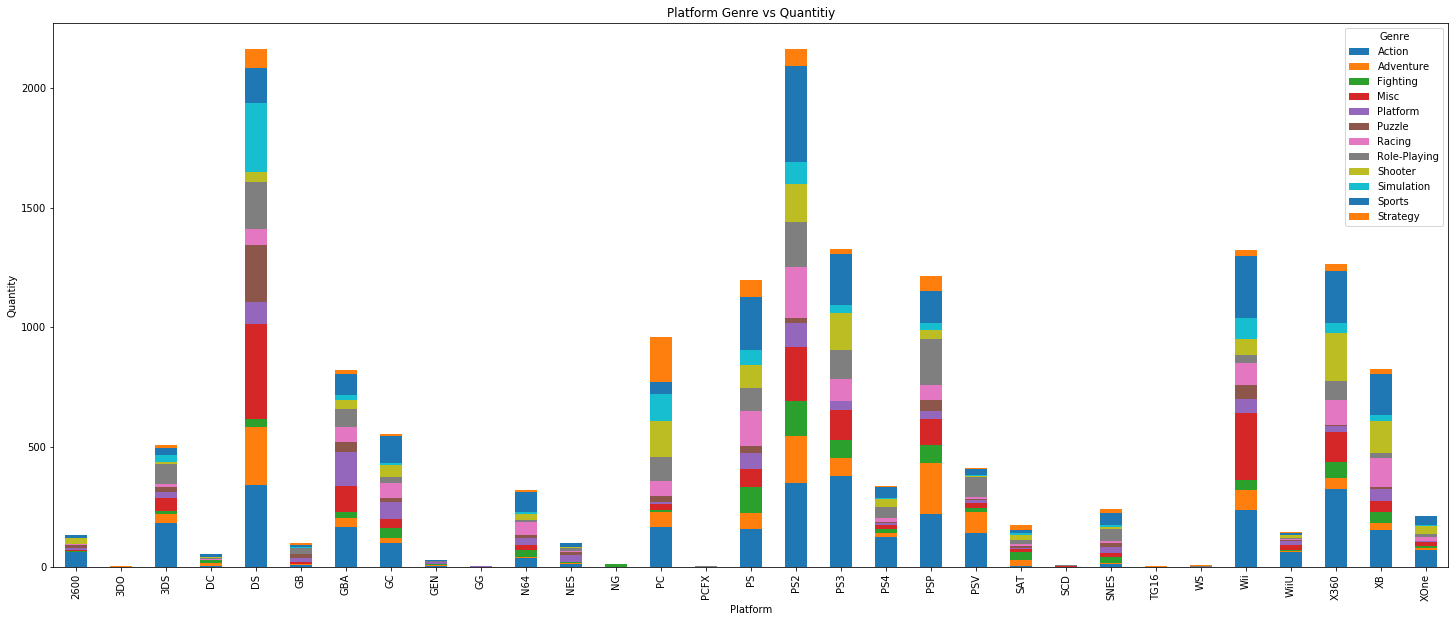

In [43]:
#Removes the columns of the unnecessary data
publisher_df = new_df.drop(["Rank", "Year","NA_Sales","EU_Sales", "JP_Sales", "Other_Sales","Publisher"], axis=1) 



#Sums the Global Sales

publisher_df.groupby(["Platform", "Genre"]).size().unstack().plot(kind="bar", stacked="True", figsize=(25,10))
plt.xlabel("Platform")
plt.ylabel("Quantity")
plt.title("Platform Genre vs Quantitiy")
#Creates the bar graph
